In [2]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection", sep='\t', header=None)
data.columns = ['Label','SMS']
data.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Create Feature : Message Length

In [3]:
data['SMS_Len'] = data['SMS'].apply(lambda x : len(x))
data.head()

,Label,SMS,SMS_Len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Create Feature: Punctuation Usage

In [5]:
import string

def punc_count(text):
    count = sum(1 for c in text if c in string.punctuation)
    return 100*count/len(text)#for getting the % of punctuation usage

data['Punctuation_%'] = data['SMS'].apply(lambda x:punc_count(x))
data.head()

,Label,SMS,SMS_Len,Punctuation_%
0,ham,"Go until jurong point, crazy.. Available only ...",111,8.108108
1,ham,Ok lar... Joking wif u oni...,29,20.689655
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3.870968
3,ham,U dun say so early hor... U c already then say...,49,12.244898
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,3.278689


# Evaluate Created Features

In [8]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Plot message lengths for spam and ham

<function matplotlib.pyplot.show(close=None, block=None)>

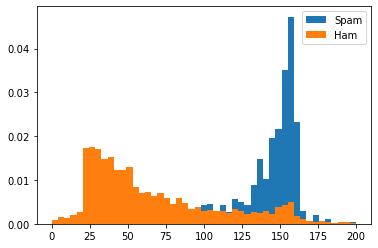

In [16]:
bins = np.linspace(0, 200, 50)
plt.hist(data[data['Label']=="spam"]['SMS_Len'],bins, label='Spam', density=True)
plt.hist(data[data['Label']=="ham"]['SMS_Len'],bins, label='Ham', density=True)
plt.legend(loc="upper right")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

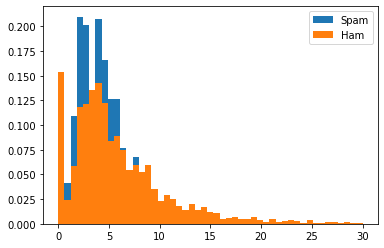

In [17]:
bins = np.linspace(0, 30, 50)
plt.hist(data[data['Label']=="spam"]['Punctuation_%'],bins, label='Spam', density=True)
plt.hist(data[data['Label']=="ham"]['Punctuation_%'],bins, label='Ham', density=True)
plt.legend(loc="upper right")
plt.show

# Plot new features in histogram to check if the data is skewed(Candidate for Transformation)

<function matplotlib.pyplot.show(close=None, block=None)>

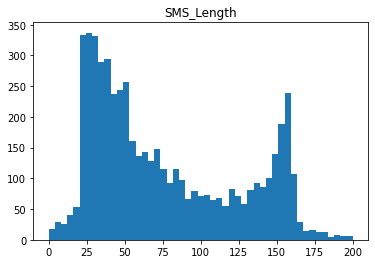

In [20]:
bins = np.linspace(0, 200, 50)
plt.hist(data['SMS_Len'],bins)
plt.title("SMS_Length")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

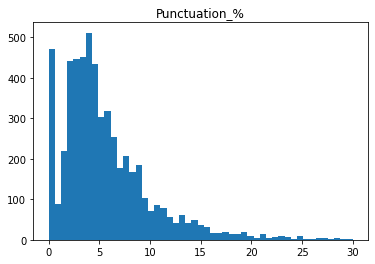

In [21]:
bins = np.linspace(0, 30, 50)
plt.hist(data['Punctuation_%'],bins)
plt.title("Punctuation_%")
plt.show

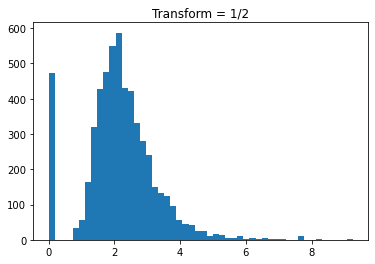

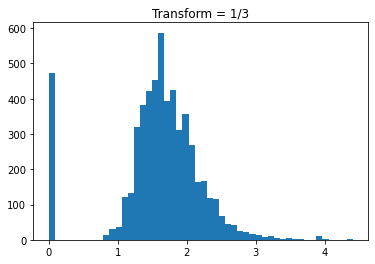

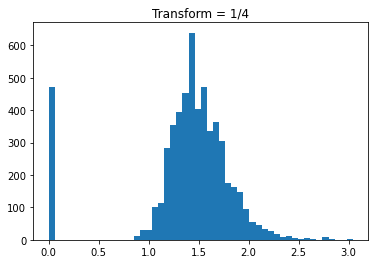

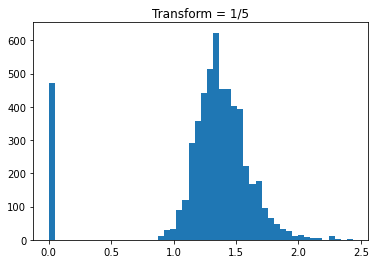

In [25]:
#Trying by taking the root of values

for i in [2,3,4,5]:
    plt.hist((data['Punctuation_%'])**(1/i),bins = 50)
    plt.title(f"Transform = 1/{i}")
    plt.show()